# Community detection - **Igraph**

---------------------------------------------

Installing libraries



In [ ]:
!pip install python-igraph
!pip install cairocffi

In [ ]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.optimize import curve_fit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating a **graph** from a pandas dataframe

In [ ]:
def get_graph(adj_matfile, neuron_namesfile):
    # import the adjacency matrix from text file
    adjacency = np.loadtxt(adj_matfile,dtype='int')
    print("Shape of adjacency matrix:", adjacency.shape)

    # import names of each neuron
    f = open(neuron_namesfile,"r") #opens file with name of "test.txt"
    neuron_names = []
    for line in f:
        neuron_names.append(line[:-1]) #[:-1] because we don't want /n in the end.  
    #print((neuron_names2))
    n_neurons = len(neuron_names)
    print("Total number of neurons:",n_neurons)
    
    # create node and node attributes which is the name for the graph
    nodes_list = []
    for i in range(len(neuron_names)):
        #node attribute is given by its neuron name
        nodes_list.append((i,{"name":neuron_names[i]}))
    #print(len(nodes_list))

    # creating an edge list from adjacency matrix
    edge_list=[]
    for i in range(len(neuron_names)):
        for j in range(len(neuron_names)):
            if adjacency[i,j]==0: # if there's no weight, let's forget the edge.
                pass
            else:
                edge_list.append( (i,j,{"weight":adjacency[i,j],"Label":"%s - %s"%(neuron_names[i],neuron_names[j])}) )
    # Creating a directed graph from adjacency matrix so that it will be easy to deal using the networkx module

    G = nx.DiGraph()

    # Add all the nodes to the graph
    G.add_nodes_from(nodes_list)
    # Add all the edges to the graph
    G.add_edges_from(edge_list)

    return adjacency, neuron_names, n_neurons, G

In [ ]:
adj, neuron_names, number_neurons, G = get_graph("/content/drive/MyDrive/Network Science/Delfina/adjacency.txt", "/content/drive/MyDrive/Network Science/Delfina/neuron_names.txt")


Shape of adjacency matrix: (3163, 3163)
Total number of neurons: 3163


In [ ]:
G.is_directed()

True

From *networkx* to *igraph*

In [ ]:
%%time 
#usually takes up to 1 hour with CPU 
g = ig.Graph.from_networkx(G)

for vertice in g.vs[0:10]:
    print(vertice.attributes())
for edge in g.es[0:10]:
    print(edge.attributes())

{'_nx_name': 0, 'name': 'T_161121_HuCxBG_8_3'}
{'_nx_name': 1, 'name': 'T_190702_317xBG_13_3'}
{'_nx_name': 2, 'name': '20160928_1013_BGUG_HuC_ltRFP_d7_F3'}
{'_nx_name': 3, 'name': '20161004_1013_BGUG_HuC_ltRFP_d5_F1_Neuron2'}
{'_nx_name': 4, 'name': 'T_191204_1_3'}
{'_nx_name': 5, 'name': 'T_160920_11_1'}
{'_nx_name': 6, 'name': 'T_180111_7_1'}
{'_nx_name': 7, 'name': 'T_191115_3_4'}
{'_nx_name': 8, 'name': 'T_170303_11_1'}
{'_nx_name': 9, 'name': 'T_160607_7_2'}
{'weight': 32, 'Label': 'T_161121_HuCxBG_8_3 - T_161031_4_2'}
{'weight': 35, 'Label': 'T_161121_HuCxBG_8_3 - T_190527_1181xBG_13_1'}
{'weight': 55, 'Label': 'T_161121_HuCxBG_8_3 - T_180102_14_2'}
{'weight': 70, 'Label': 'T_161121_HuCxBG_8_3 - T_161121_HuCxBG_14_2'}
{'weight': 19, 'Label': 'T_161121_HuCxBG_8_3 - T_170714_5_1'}
{'weight': 25, 'Label': 'T_161121_HuCxBG_8_3 - T_190121_3_4'}
{'weight': 9, 'Label': 'T_161121_HuCxBG_8_3 - T_191016_5_2'}
{'weight': 19, 'Label': 'T_161121_HuCxBG_8_3 - T_190527_1181xBG_17_1'}
{'weight'

*Plotting* network

In [ ]:
from matplotlib import cm

grays = cm.get_cmap('gray')
grays(0.2)
import seaborn as sns
seq_col_brew = sns.color_palette("Greys",10)

max_1 = np.max(g.es['weight'])
g.es["color"] = [seq_col_brew[int(v/max_1)] for v in g.es['weight']]
seq_col_brew
visual_style = {}

In [ ]:
visual_style = {}

# Set bbox and margin
visual_style["bbox"] = (15000,15000)
visual_style["margin"] = 1

# Set vertex colours
visual_style["vertex_color"] = 'lightseagreen'
visual_style["edge_color"] = "lightgray" #g.es["color"]
visual_style["vertex_label"] = g.vs['_nx_name']

# Set vertex size
visual_style["vertex_size"] = 120
#g.es["color"] = False

visual_style["edge_width"] = .3
visual_style["edge_length"] = [100/x for x in g.es["weight"]]

# Set vertex lable size
visual_style["vertex_label_size"] = 70

# Don't curve the edges
visual_style["edge_curved"] = 0.3

# Set the layout
#my_layout = g.layout(layout='kk') #kamada-kawai layout
#my_layout = g.layout(layout='tree')  #tree
#my_layout = g.layout(layout='circle') #circle
#my_layout = g.layout(layout='auto') #automatic
my_layout = g.layout(layout='drl') #Frucherman-Reingold layout

visual_style["layout"] = my_layout

#background
visual_style["background"] = "white"

#colors = ig.drawing.colors.known_colors
#visual_style["vertex_label_color"] = [random.choice(list(colors.keys())) for v in g.vs()]

# Plot the graph
#ig.plot(g, "Figure_general.png",**visual_style, vertex_frame_color = 'seagreen' , directed = True, loops = False )

In [ ]:
np.mean(g.es['weight'])

23.747343883342783

# Community detection

## Walktrap

In [ ]:
def Community_save(Graph, comunidadeds, filename):
  membership = comunidadeds.membership
  df = pd.DataFrame()
  df['Node'] = Graph.vs['_nx_name']
  df['Community'] = membership

  ax = df.hist(column='Community', bins = np.max(df['Community']+1),  grid=False, figsize=(12,8), color='lightseagreen', zorder=1, rwidth=0.9)

  ax = ax[0]
  for x in ax:

      # Despine
      x.spines['right'].set_visible(False)
      x.spines['top'].set_visible(False)
      x.spines['left'].set_visible(False)

      # Switch off ticks
      x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

      # Draw horizontal axis lines
      vals = x.get_yticks()
      for tick in vals:
          x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

      # Remove title
      x.set_title("")

      # Set x-axis label
      x.set_xlabel("Community class", labelpad=20, weight='bold', size=15)

      # Set y-axis label
      x.set_ylabel("Size", labelpad=20, weight='bold', size=15)
    
      x.set_title("Communities using "+filename+" algoritm ",  size=20)


  for c in range(np.max(df['Community']+1)):
    print ("Community = ", c)
    node = []
    member = []
    C = df[df['Community'] == c]
    C = C.reset_index(drop=True)
    comm = pd.DataFrame()
    for j in range(len(C)):
      node.append((C['Node'][j]))
      member.append((C['Community'][j]))

    comm['Node'] = node
    comm['Community'] =  member
    
    comm.to_csv("Data/"+filename+str(c)+".csv", index=False)

In [ ]:
#https://towardsdatascience.com/detecting-communities-in-a-language-co-occurrence-network-f6d9dfc70bab
#The basic idea of the algorithm is that short random walks tend to stay in the same community. 
wtrap_clust = g.community_walktrap(steps = 4, weights= g.es['weight'] )
wtrap_clust=wtrap_clust.as_clustering()

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24
Community =  25
Community =  26
Community =  27
Community =  28
Community =  29
Community =  30
Community =  31
Community =  32
Community =  33
Community =  34
Community =  35
Community =  36
Community =  37
Community =  38
Community =  39
Community =  40


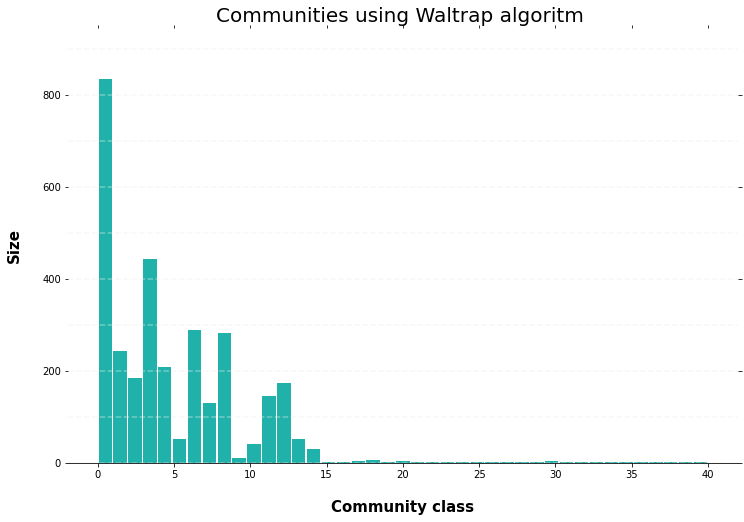

In [ ]:
Community_save(g, wtrap_clust, "Waltrap")

## spinglass

3154
summary: Clustering with 3154 elements and 17 clusters
T_160920_11_1, T_190121_3_7, 20170228_1013_BGUG_HuC_ltRFP_d5_F1, T_16119_13_1, T_190718_13_1, T_161031_23_2, T_161031_4_2, T_170221_9_2, T_190218_12_2, T_161121_HuCxBG_2_1, T_161108_1_1, T_161031_12_4, T_190527_1181xBG_13_1, T_190711_6_1, T_160714_6_1, 20160920_1013_BGUG_HuC_ltRFP_d6_F7, T_170303_3_1, T_190711_0_1, T_161026_HuCxBG_erksyp_15_2, 20170228_1013_BGUG_HuC_ltRFP_d5_F6, T_190125_9_2, T_160913_HuCxBG_8_1, T_190221_20_1, 20170715_1013_BGUG_HuC_ltRFP_d7_F5, T_160927_HuCxBG_Erk_4_1, 20161125_1013_BGUG_HuC_ltRFP_d7_F2_Neuron2, T_160705_11_1, T_190125_6_1, T_190213_18_1, T_190206_15_3, T_190115_22_1_complemented, T_191007_21_1, T_160809_4_3, T_181008_6_1_Eva, T_190702_317xBG_9_2, T_160527_13_3, T_191011_6_1, T_161129_19_1, T_180111_7_2, 20161205_1013_BGUG_HuC_ltRFP_d5_F6, T_150529_354_fixed_6_1_full_tracing, T_160607_15_1, 20160920_1013_BGUG_HuC_ltRFP_d6_F5, T_150714_3_3_full_tracing, T_160920_23_2, 20170220_1013_BGUG_HuC_l

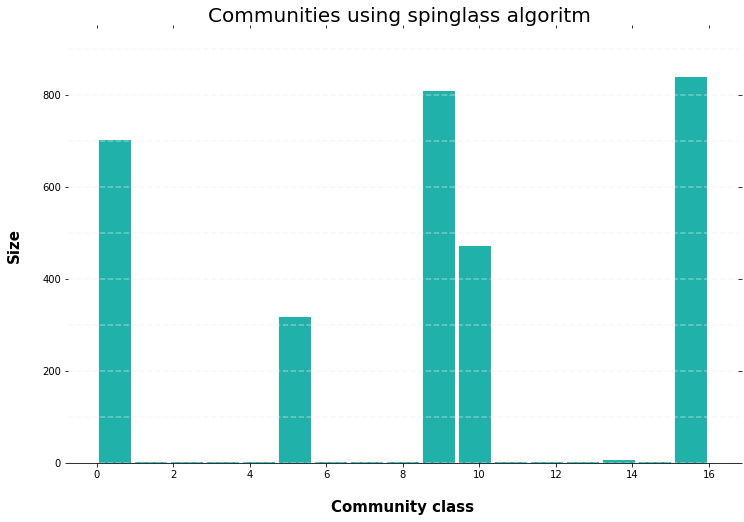

In [ ]:
largest = g.clusters().giant()
print(len(largest.vs))
spinglass=largest.community_spinglass()
print("summary:", spinglass.summary(1))
print("modularity:", spinglass.modularity)

Community_save(largest, spinglass, "spinglass")

## Infomap

In [ ]:
info_clust=g.community_infomap( edge_weights= g.es['weight'])
print("summary:", info_clust.summary(1))
print("modularity:", info_clust.modularity)
infomap_modularity = info_clust.modularity

#pal = ig.drawing.colors.ClusterColoringPalette(len(dendrogram))
#g.vs['color'] = pal.get_many(dendrogram.membership)
#visual_style['vertex_color'] = g.vs['color']
#visual_style['vertex_size'] = 300
#ig.plot(g, "infomap.png", **visual_style )

summary: Clustering with 3163 elements and 47 clusters
T_161121_HuCxBG_8_3, T_180111_7_1, T_180102_14_2, T_190121_3_4, T_150707_18_3_full_tracing, T_160406_5b_1, T_190115_24_4, T_161116_19_1, T_170327_12_1, T_170529_15_1, T_160617_HuCxBG_5_2_complemented, T_190924_2_1, T_190719_1_2, T_160812_5_4, T_190626_12_3, T_181026_12_1, T_160607_14_1, T_191204_1_1, T_190924_32_2, 20160726_1013_BGUG_HuC_ltRFP_d6_F2, T_190405_2_1, T_190702_317xBG_11_1_M, T_190711_8_2, T_191007a_3_1, T_160617_HuCxBG_2_2_corrected, T_160812_5_3, T_170119_3_1, T_190711_12_4, T_161121_HuCxBG_11_1, T_161005_HuCxBG_erk_5_1, T_190527_1181xBG_0_1_M, T_161108_1_3, T_160812_10_1, T_190125_15_3, T_190401_7_4, T_160527_6_1, T_180112_17_2, T_190702_317xBG_20_1, T_190702_317xBG_1_1, T_190527_1181xBG_19_2, T_190121_18_1, T_160527_18_1, T_160518_6_4, T_150324_fixed_11_2_full_tracing, T_180102_18_1, T_190405_13_3, T_160502_2_2, T_190115_21_1, T_190527_1181xBG_4_1, T_190426_1181xBG_2_2, T_161116_20_4, T_160708_12_1, T_190626_13_1_M,

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24
Community =  25
Community =  26
Community =  27
Community =  28
Community =  29
Community =  30
Community =  31
Community =  32
Community =  33
Community =  34
Community =  35
Community =  36
Community =  37
Community =  38
Community =  39
Community =  40
Community =  41
Community =  42
Community =  43
Community =  44
Community =  45
Community =  46


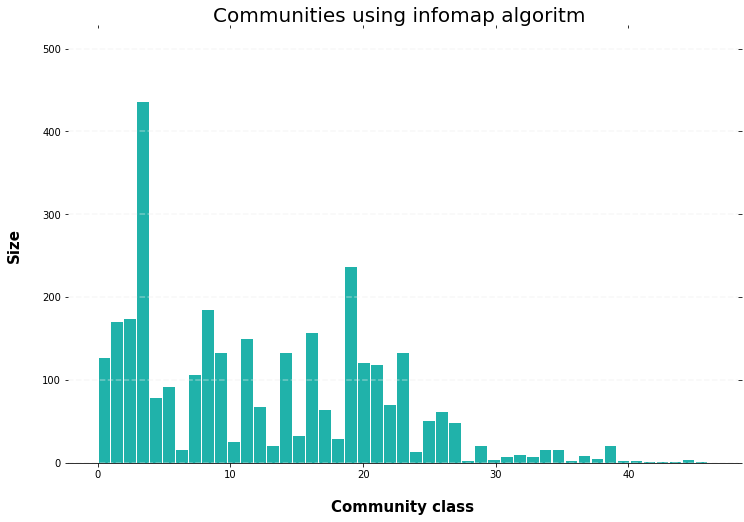

In [ ]:
Community_save(g, info_clust, "infomap" )

## Label propagation

summary: Clustering with 3163 elements and 45 clusters
T_161121_HuCxBG_8_3, T_160920_11_1, T_180111_7_1, T_170303_11_1, T_160607_7_2, T_190121_3_7, T_191119_7_1, 20170228_1013_BGUG_HuC_ltRFP_d5_F1, T_170601_6_1, T_160524_5_5, T_190613_1181xBG_5_4, T_190718_13_1, T_161031_4_2, T_170221_9_2, T_160705_6_1, T_161031_12_4, T_190527_1181xBG_13_1, T_190711_6_1, T_170601_0_1, T_160714_6_1, T_170201_5_3, T_191115_1_1, T_190723_0_1, T_151130_15_2, 20160920_1013_BGUG_HuC_ltRFP_d6_F7, T_160520_11_2, T_170303_3_1, T_190909_11_1_M, T_160406_6_2, T_161121_HuCxBG_14_2, T_170714_5_1, 20170809_1013_BGUG_HuC_ltRFP_d5_F3, T_161031_1_2, T_190121_3_4, T_190125_7_1, T_160913_HuCxBG_8_1, T_190401_6_6, 20170715_1013_BGUG_HuC_ltRFP_d7_F5, T_160927_HuCxBG_Erk_4_1, T_190115_24_5, T_160920_6_1, 20161125_1013_BGUG_HuC_ltRFP_d7_F2_Neuron2, T_160705_11_1, T_160708_HuCxBG_16_3, T_190125_6_1, T_180604_11_1, T_150707_18_3_full_tracing, T_190405_17_1, T_160721_HuCxBG_6_2, T_190125_8_4, T_191007_21_1, T_190121_14_3, T_160

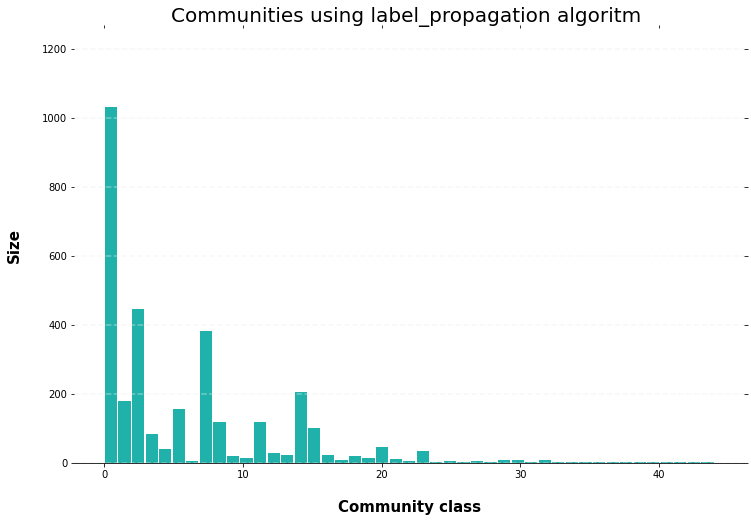

In [ ]:
label_clust=g.community_label_propagation( weights= g.es['weight'])
print("summary:", label_clust.summary(1))
print("modularity:", label_clust.modularity)

Community_save(g, label_clust, "label_propagation")

### Edge betweenness -- broke ram

## ziping files

In [ ]:
! zip results_l.zip Data/*.csv

updating: Data/infomap0.csv (deflated 61%)
updating: Data/infomap10.csv (deflated 48%)
updating: Data/infomap11.csv (deflated 67%)
updating: Data/infomap12.csv (deflated 63%)
updating: Data/infomap13.csv (deflated 45%)
updating: Data/infomap14.csv (deflated 66%)
updating: Data/infomap15.csv (deflated 53%)
updating: Data/infomap16.csv (deflated 68%)
updating: Data/infomap17.csv (deflated 62%)
updating: Data/infomap18.csv (deflated 50%)
updating: Data/infomap19.csv (deflated 68%)
updating: Data/infomap1.csv (deflated 63%)
updating: Data/infomap20.csv (deflated 67%)
updating: Data/infomap21.csv (deflated 66%)
updating: Data/infomap22.csv (deflated 62%)
updating: Data/infomap23.csv (deflated 67%)
updating: Data/infomap24.csv (deflated 37%)
updating: Data/infomap25.csv (deflated 61%)
updating: Data/infomap26.csv (deflated 62%)
updating: Data/infomap27.csv (deflated 60%)
updating: Data/infomap28.csv (deflated 7%)
updating: Data/infomap29.csv (deflated 45%)
updating: Data/infomap2.csv (deflat

In [ ]:
! zip results.zip *.png

	zip warning: name not matched: *.png

zip error: Nothing to do! (results.zip)


## Lovain

In [ ]:
!pip install louvain==0.5.3

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for louvain: filename=louvain-0.5.3-cp36-cp36m-linux_x86_64.whl size=865078 sha256=0e2525652881c2fdfaea15b49af9848b112bd9db6c46fabe17d5f6c357408bdb
  Stored in directory: /root/.cache/pip/wheels/28/e0/c7/3c03b4c71405271480f172e570262085d66c7203765c8b569a
Successfully built louvain


In [ ]:
import louvain

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12


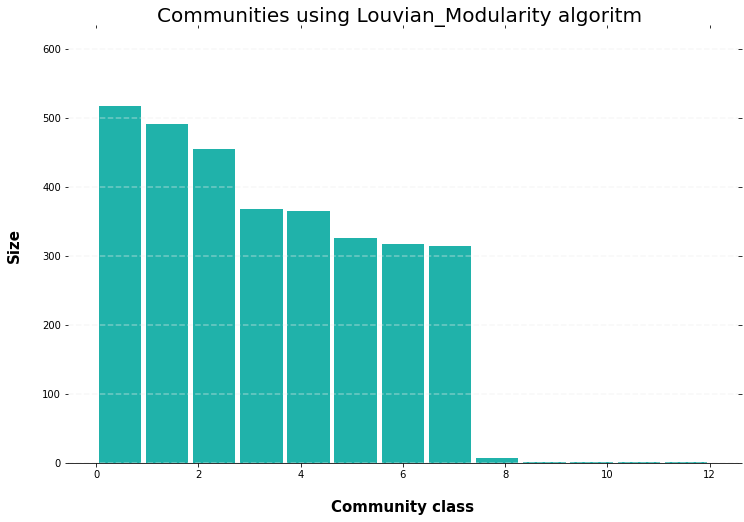

In [ ]:
louvian_clust = louvain.find_partition(g, method='Modularity', weight='weight')
Community_save(g, louvian_clust, "Louvian_Modularity")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12


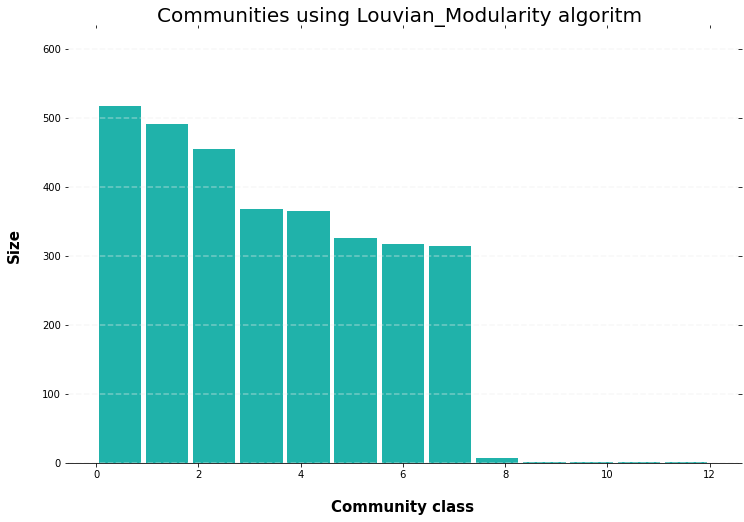

In [ ]:
Community_save(g, louvian_clust, "Louvian_Modularity")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24
Community =  25
Community =  26
Community =  27
Community =  28
Community =  29
Community =  30
Community =  31
Community =  32
Community =  33
Community =  34
Community =  35
Community =  36
Community =  37
Community =  38
Community =  39
Community =  40
Community =  41
Community =  42
Community =  43
Community =  44
Community =  45
Community =  46
Community =  47
Community =  48
Community =  49
Community =  50
Community =  51
Community =  52
Community =  53
Community =  54


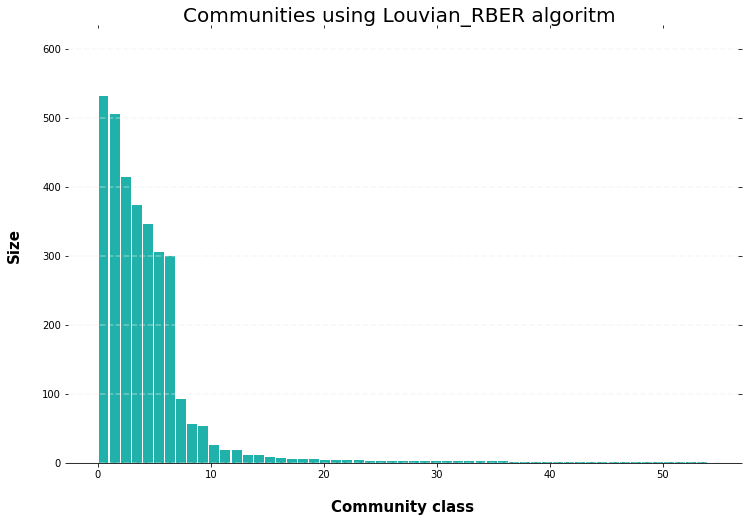

In [ ]:
louvian_clust_RBER = louvain.find_partition(g, method='RBER', weight='weight')
Community_save(g, louvian_clust_RBER, "Louvian_RBER")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24
Community =  25
Community =  26
Community =  27
Community =  28
Community =  29
Community =  30
Community =  31
Community =  32
Community =  33
Community =  34
Community =  35
Community =  36
Community =  37
Community =  38
Community =  39
Community =  40
Community =  41
Community =  42
Community =  43
Community =  44
Community =  45
Community =  46
Community =  47
Community =  48
Community =  49
Community =  50
Community =  51
Community =  52
Community =  53
Community =  54


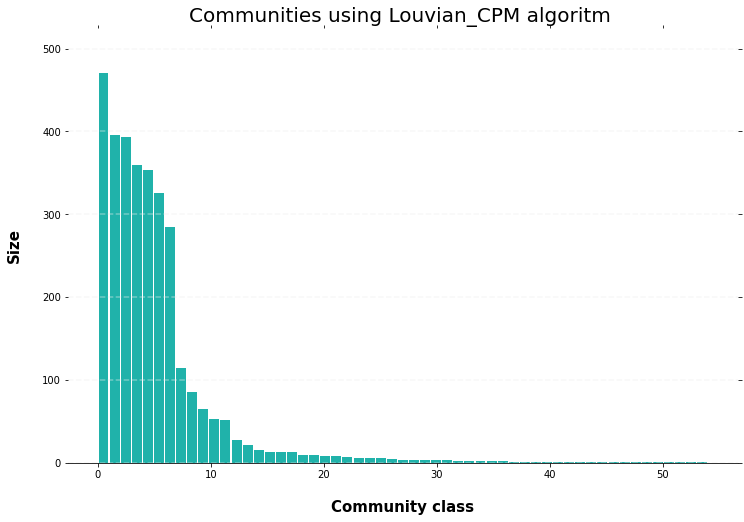

In [ ]:
louvian_clust_CPM = louvain.find_partition(g, method='CPM', weight='weight')
Community_save(g, louvian_clust_CPM, "Louvian_CPM")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24
Community =  25
Community =  26
Community =  27
Community =  28
Community =  29
Community =  30
Community =  31
Community =  32
Community =  33
Community =  34
Community =  35
Community =  36
Community =  37
Community =  38
Community =  39
Community =  40
Community =  41
Community =  42
Community =  43
Community =  44
Community =  45
Community =  46
Community =  47
Community =  48
Community =  49
Community =  50
Community =  51
Community =  52
Community =  53
Community =  54
Community =  55
Community =  56
Community =  57
Community =  58
Community =  59
Community =  60
Community =  61
Community =  62
Co

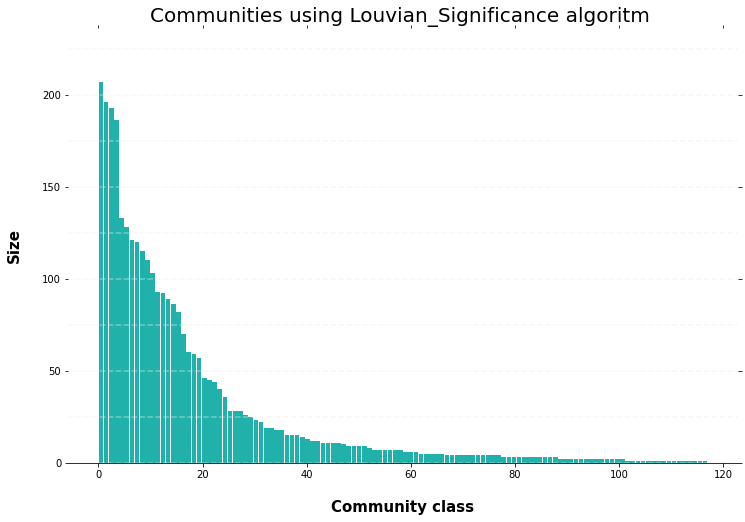

In [ ]:
louvian_clust_sig = louvain.find_partition(g, method='Significance')
Community_save(g, louvian_clust_sig, "Louvian_Significance")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24
Community =  25
Community =  26
Community =  27
Community =  28
Community =  29
Community =  30
Community =  31
Community =  32
Community =  33
Community =  34
Community =  35
Community =  36
Community =  37
Community =  38
Community =  39
Community =  40
Community =  41
Community =  42
Community =  43
Community =  44
Community =  45
Community =  46
Community =  47
Community =  48
Community =  49
Community =  50
Community =  51
Community =  52
Community =  53
Community =  54
Community =  55
Community =  56
Community =  57
Community =  58
Community =  59
Community =  60
Community =  61
Community =  62
Co

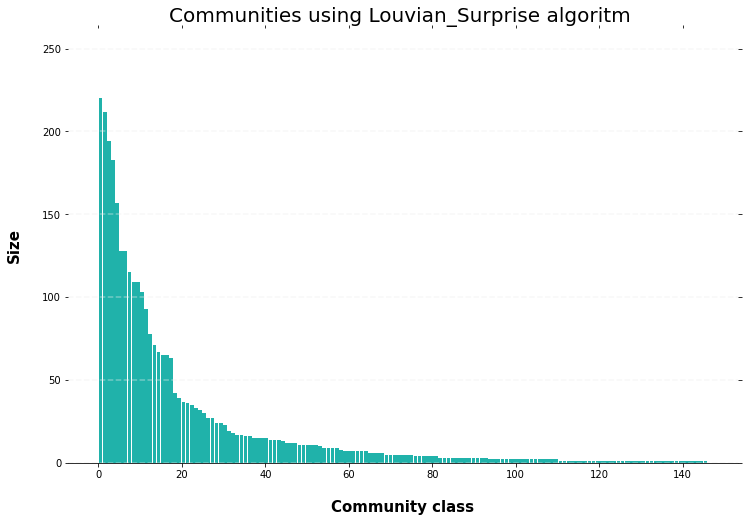

In [ ]:
louvian_clust_surp = louvain.find_partition(g, method='Surprise', weight='weight')
Community_save(g, louvian_clust_surp, "Louvian_Surprise")

In [ ]:
method_communities = [wtrap_clust,info_clust, label_clust, louvian_clust, louvian_clust_RBER,   louvian_clust_CPM, louvian_clust_sig,  louvian_clust_surp,  spinglass] 

##Comparing communities

### Split joint Distance

In [ ]:
#Calculates the split-join distance between two community structures.
split_distance = np.zeros((len(method_communities),len(method_communities)))

i = 0
for met1 in method_communities:
  j = 0
  for met2 in method_communities:
    split_distance[i][j] = ig.compare_communities(met1, met2, method='split')
    j+=1
  i+= 1


In [ ]:
split_distance = pd.DataFrame(split_distance)


In [ ]:
method_communities_names = ["Walktrap" , "Infomap", "Label propagation", "Louvian Modularity","Louvian RBER", "Louvian CPM" , "Louvian Significance", "Louvian Surprise",  "Spin Glass" ] 

In [ ]:
split_distance.columns = method_communities_names
split_distance.index = method_communities_names


In [ ]:
split_distance


,Walktrap,Infomap,Label propagation,Louvian,Louvian RBER,Louvian CPM,Louvian Significance,Louvian Surprise
Walktrap,0.0,2076.0,2465.0,2154.0,1990.0,2062.0,2180.0,2155.0
Infomap,2076.0,0.0,2421.0,1997.0,2056.0,1979.0,1734.0,1744.0
Label propagation,2465.0,2421.0,0.0,2683.0,2479.0,2584.0,2482.0,2589.0
Louvian,2154.0,1997.0,2683.0,0.0,970.0,1145.0,2389.0,2217.0
Louvian RBER,1990.0,2056.0,2479.0,970.0,0.0,513.0,2184.0,2092.0
Louvian CPM,2062.0,1979.0,2584.0,1145.0,513.0,0.0,2108.0,1987.0
Louvian Significance,2180.0,1734.0,2482.0,2389.0,2184.0,2108.0,0.0,1438.0
Louvian Surprise,2155.0,1744.0,2589.0,2217.0,2092.0,1987.0,1438.0,0.0


Text(0.5, 1.0, 'Split distance')

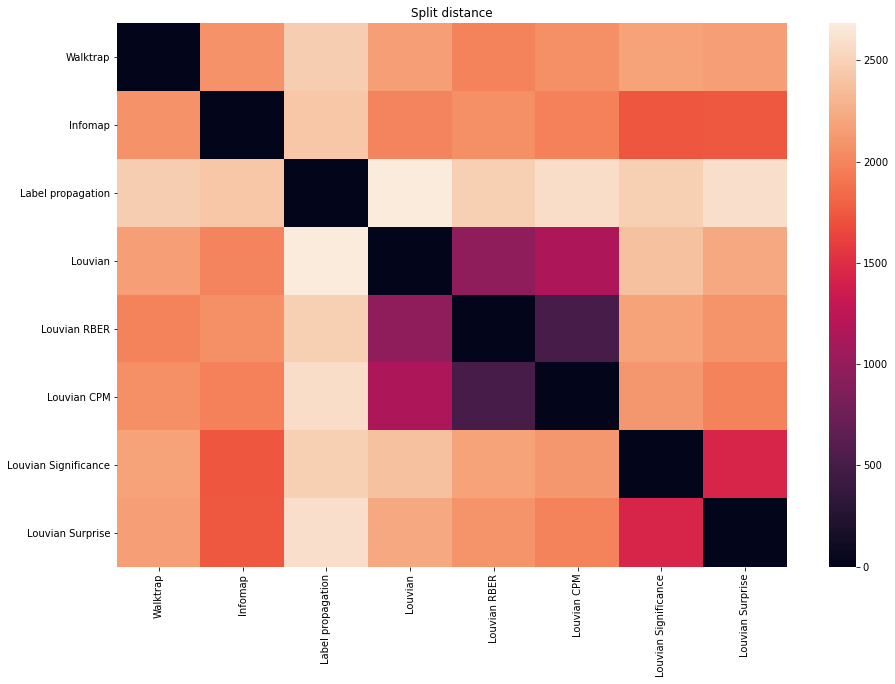

In [ ]:
plt.figure(figsize = (15,10))
sns.color_palette("icefire", as_cmap=True)
r = sns.heatmap(split_distance)
r.set_title("Split distance")

### VI measures


In [ ]:
ig.compare_communities(wtrap_clust, wtrap_clust, method='vi')

0.0

In [ ]:
#Calculates the split-join distance between two community structures.
VI_comparison = np.zeros((len(method_communities),len(method_communities)))

i = 0
for met1 in method_communities:
  j = 0
  for met2 in method_communities:
    VI_comparison[i][j] = ig.compare_communities(met1, met2, method='vi')
    j+=1
  i+= 1


ValueError: ignored

Text(0.5, 1.0, 'VI measure')

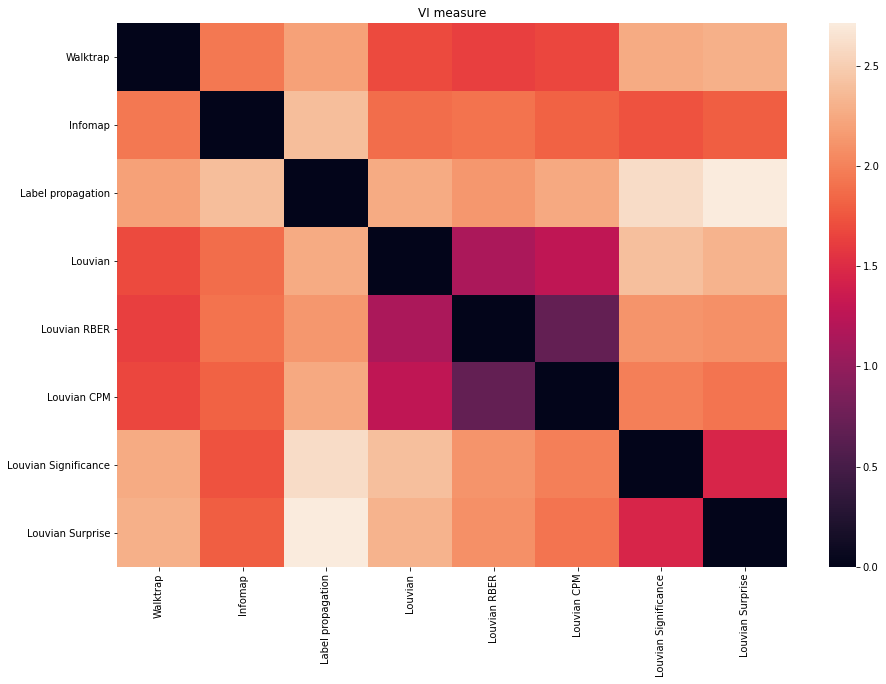

In [ ]:
VI_comparison = pd.DataFrame(VI_comparison)

VI_comparison.columns = method_communities_names
VI_comparison.index = method_communities_names

plt.figure(figsize = (15,10))
sns.color_palette("icefire", as_cmap=True)
r = sns.heatmap(VI_comparison)
r.set_title("VI measure")

### NMI

In [ ]:
#Calculates the split-join distance between two community structures.
NMI_comparison = np.zeros((len(method_communities),len(method_communities)))

i = 0
for met1 in method_communities:
  j = 0
  for met2 in method_communities:
    NMI_comparison[i][j] = ig.compare_communities(met1, met2, method='nmi')
    j+=1
  i+= 1


Text(0.5, 1.0, 'NMI measure')

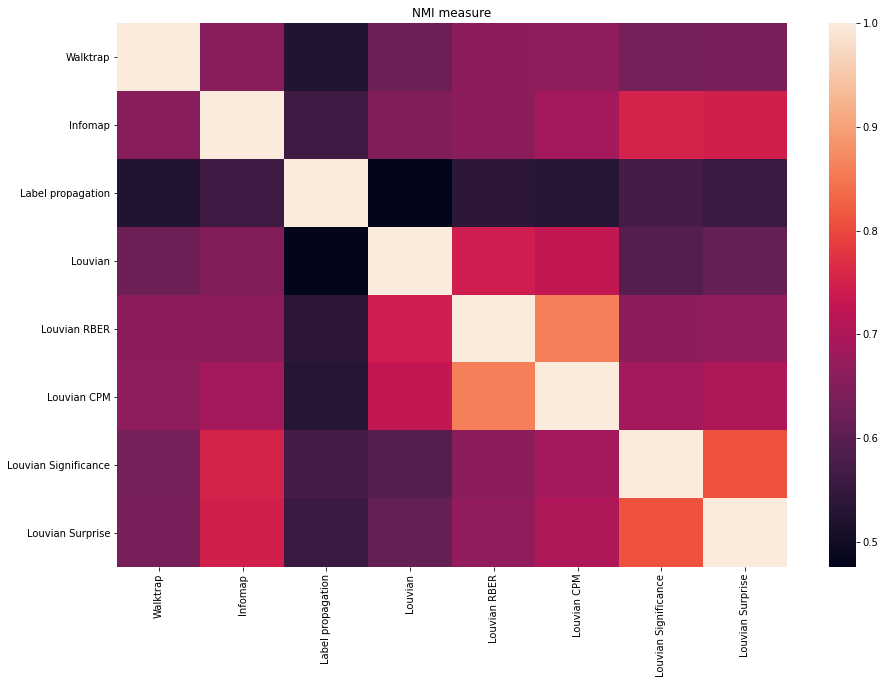

In [ ]:
NMI_comparison = pd.DataFrame(NMI_comparison)

NMI_comparison.columns = method_communities_names
NMI_comparison.index = method_communities_names

plt.figure(figsize = (15,10))
sns.color_palette("icefire", as_cmap=True)
r = sns.heatmap(NMI_comparison)
r.set_title("NMI measure")

## Modularity - MUST BE DONE UNDIRECTED DO NOT RUN THIS UNNECESARY OR YOU WILL HAVE TO RUN AGAIN EVERYTHING

In [ ]:
g.to_undirected()

In [ ]:
for i in range(len(method_communities)):
  print("Modularity of "+method_communities_names[i]+"=", g.modularity(method_communities[i]))

Modularity of Walktrap= 0.3802450837863931
Modularity of Infomap= 0.3508788100090507
Modularity of Label propagation= 0.31201530520516363
Modularity of Louvian= 0.4606259408656247
Modularity of Louvian RBER= 0.4540406012788622
Modularity of Louvian CPM= 0.4440202422630035
Modularity of Louvian Significance= 0.3227172334507716
Modularity of Louvian Surprise= 0.3050762912780356
